In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

In [2]:
def flatten_image(img_dir):
    img=cv2.imread(img_dir)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_img=np.array(gray_img.flatten())
    return gray_img

In [3]:
def sigmoid(x):
    x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x))

In [4]:
def sigmoid_derivate(x):
    return np.exp(x)/np.square((1+np.exp(x)))

In [5]:
def softmax(x):
    exp_x = np.exp(x)  # Stability trick to avoid overflow
    return exp_x / exp_x.sum(axis=0, keepdims=True)

In [6]:
def cross_entropy_loss(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]

In [7]:
def cross_entropy_loss_derivative(y_true, y_pred):
    return y_pred - y_true

In [8]:
def forward_prop_step(layer,weights,bias):
    # print(weights.size,layer.size)
    return np.matmul(weights,layer)+bias
    

In [9]:
img_dir="/home/abhishek/Documents/workspace/Sem-5/Foundation_of_Natural_Intellegence/Neural-Net/Digit/trainingSample/1/img_0.jpg"
layer=flatten_image(img_dir)

In [10]:
weights=np.identity(784)
bias=np.zeros(784)
print(sigmoid(forward_prop_step(layer,weights,bias)))

[0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.9999546  0.5
 0.99966465 0.5        0.9999833  0.5        0.5        0.99330715
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.99966465
 0.5        0.5        0.98201379 0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.99330715 0.98201379 0.98201379 0.5        0.99987661 1.
 0.5        1.         0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5 

In [11]:
def forward_propagation(network, x):
    z1 = forward_prop_step(x, network['W1'], network['b1'])
    a1 = sigmoid(z1)
    
    z2 = forward_prop_step(a1, network['W2'], network['b2'])
    a2 = sigmoid(z2)
    
    z3 = forward_prop_step(a2, network['W3'], network['b3'])
    a3 = sigmoid(z3)
    
    z4 = forward_prop_step(a3, network['W4'], network['b4'])
    output_layer = softmax(z4)  
    
    return z1, a1, z2, a2, z3, a3, z4, output_layer


In [72]:
def network_architechture():
    network = {
        'W1': np.random.randn(8, 784), 
        'b1': np.random.randn(8,1),       
            
        'W2': np.random.randn(4, 8),   
        'b2': np.random.randn(4,1),       
        
        'W3': np.random.randn(4, 4),   
        'b3': np.random.randn(4,1),       
        
        'W4': np.random.randn(10, 4),   
        'b4': np.random.randn(10,1)        
    }
    return network

In [73]:
def compute_loss_function(y_pred,y_true):
    return np.mean(np.square(y_pred-y_true))

In [74]:
def sigmoid_derivate(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

In [75]:
def forward_propagation(network, x):
    z1 = forward_prop_step(x, network['W1'], network['b1'])
    a1 = sigmoid(z1)
    
    z2 = forward_prop_step(a1, network['W2'], network['b2'])
    a2 = sigmoid(z2)
    
    z3 = forward_prop_step(a2, network['W3'], network['b3'])
    a3 = sigmoid(z3)
    
    z4 = forward_prop_step(a3, network['W4'], network['b4'])
    output_layer = softmax(z4)  
    
    return z1, a1, z2, a2, z3, a3, z4, output_layer


In [76]:
def train(network,x,y_true,learning_rate=0.01):
    epochs=30
    for epoch in range(epochs):
        #print(f"epoch {epoch}")
        network = back_propagation(network, x, y_true, learning_rate=0.001)
    return network

In [77]:
def back_propagation(network, x, y_true, learning_rate=0.01):
    # Forward pass
    z1, a1, z2, a2, z3, a3, z4, output_layer = forward_propagation(network, x)
    
    # Compute the output layer error (delta_output)
    x=x.reshape(1,784)

    delta_output = (cross_entropy_loss_derivative(y_true, output_layer)).T  # Shape (1, 10)
    # Compute gradients for W4 and b4
    dW4 = np.dot(delta_output.T, a3.T)  # Shape (10, 32)
    db4 = np.sum(delta_output.T, axis=0)  # Shape (10,)

    # Propagate error to Hidden Layer 3
    delta3 = (np.dot(delta_output, network['W4']) ) * sigmoid_derivate(z3.T)  # Shape (1, 32)
    # Compute gradients for W3 and b3
    dW3 = np.dot(delta3.T, a2.T)  # Shape (32, 32)
    db3 = np.sum(delta3.T, axis=0)  # Shape (32,)
    
    # Propagate error to Hidden Layer 2
    delta2 = np.dot(delta3, network['W3']) * sigmoid_derivate(z2.T)  # Shape (1, 32)

    # Compute gradients for W2 and b2
    dW2 = np.dot(delta2.T, a1.T)  # Shape (32, 32)
    db2 = np.sum(delta2.T, axis=0)  # Shape (32,)
    
    # Propagate error to Hidden Layer 1
    delta1 = np.dot(delta2, network['W2']) * sigmoid_derivate(z1.T)  # Shape (1, 32)
    
    # Compute gradients for W1 and b1
    dW1 = np.dot(delta1.T, x)  # Shape (32, 784)
    db1 = np.sum(delta1.T, axis=0)  # Shape (32,)
    
    # Update weights and biases using gradient descent
    network['W4'] -= learning_rate * dW4
    network['b4'] -= learning_rate * db4
    network['W3'] -= learning_rate * dW3
    network['b3'] -= learning_rate * db3
    network['W2'] -= learning_rate * dW2
    network['b2'] -= learning_rate * db2
    network['W1'] -= learning_rate * dW1
    network['b1'] -= learning_rate * db1
    
    return network


In [78]:
def train_data(diric,network,y_true):
    files=os.listdir(diric)
    for file in files:
        img_dir=os.path.join(diric,file)
        x=flatten_image(img_dir)
        x=x.reshape(784,1)
        network=train(network,x,y_true,learning_rate=0.01)
    return network

In [79]:
network=network_architechture()

In [80]:
network

{'W1': array([[-0.12505049, -1.73772474,  0.39861412, ..., -0.12648733,
         -0.56080857,  0.07647854],
        [ 0.75992058, -0.02426074, -2.42437342, ..., -0.19176095,
          0.90870297, -0.34780492],
        [ 0.25667368, -1.11863897, -0.66249868, ..., -0.47122483,
         -0.39392953, -0.21451591],
        ...,
        [-1.32201872,  0.79959303,  0.42642102, ..., -0.41158477,
         -0.52246294,  0.44466695],
        [-1.02618949,  2.00804278, -0.24777936, ..., -1.33606274,
         -0.08701815, -0.16075557],
        [-0.90269587,  0.49459761, -0.55607212, ..., -0.63135404,
         -0.53555843, -1.3814107 ]]),
 'b1': array([[ 1.33125425],
        [-2.08994898],
        [ 0.6253771 ],
        [-1.11726516],
        [-1.87798379],
        [-0.30098348],
        [ 0.19667341],
        [-0.65307906]]),
 'W2': array([[-2.03760263,  0.78237923,  0.36394743, -0.04499234, -0.23851545,
         -0.9537262 , -1.73144194, -1.7191756 ],
        [-0.45581435,  0.62676013, -1.85635787

In [81]:
img_dir="/home/abhishek/Documents/workspace/Sem-5/Foundation_of_Natural_Intellegence/Neural-Net/Digit/trainingSample/8/img_10.jpg"
x=flatten_image(img_dir)
x=x.reshape(784,1)

In [82]:
z1, a1, z2, a2, z3, a3, z4, output_layer=forward_propagation(network,x)
print((output_layer))

[[3.79368346e-03]
 [9.71285631e-03]
 [6.56498878e-03]
 [1.93588655e-03]
 [3.98313856e-03]
 [7.56640464e-01]
 [1.97170318e-01]
 [8.14091137e-03]
 [1.16399370e-02]
 [4.17815708e-04]]


In [83]:
y_true=np.array([0,0,0,0,0,0,0,0,1,0]).reshape(10,1)
network=train(network,x,y_true,learning_rate=0.01)

In [84]:
network

{'W1': array([[-0.12505049, -1.73772474,  0.39861412, ..., -0.12648733,
         -0.56080857,  0.07647854],
        [ 0.75992058, -0.02426074, -2.42437342, ..., -0.19176095,
          0.90870297, -0.34780492],
        [ 0.25667368, -1.11863897, -0.66249868, ..., -0.47122483,
         -0.39392953, -0.21451591],
        ...,
        [-1.32201872,  0.79959303,  0.42642102, ..., -0.41158477,
         -0.52246294,  0.44466695],
        [-1.02618949,  2.00804278, -0.24777936, ..., -1.33606274,
         -0.08701815, -0.16075557],
        [-0.90269587,  0.49459761, -0.55607212, ..., -0.63135404,
         -0.53555843, -1.3814107 ]]),
 'b1': array([[ 1.33125425],
        [-2.08994898],
        [ 0.6253771 ],
        [-1.11726516],
        [-1.87798379],
        [-0.30098348],
        [ 0.19667341],
        [-0.65307906]]),
 'W2': array([[-2.03760263,  0.78367468,  0.36524289, -0.04499234, -0.23851545,
         -0.9537262 , -1.73144194, -1.71788015],
        [-0.45581435,  0.62528967, -1.85782832

In [85]:
z1, a1, z2, a2, z3, a3, z4, output_layer=forward_propagation(network,x)
print((output_layer))

[[4.02837091e-03]
 [1.06676340e-02]
 [7.01399052e-03]
 [2.06429347e-03]
 [4.30183825e-03]
 [7.46227829e-01]
 [2.03268110e-01]
 [8.63935151e-03]
 [1.33346029e-02]
 [4.53979375e-04]]


In [86]:
import os

In [87]:
def load_dataset(base_dir):
    x_data = []
    y_data = []
    
    # Iterate over each digit directory (0, 1, 2, ..., 9)
    for digit in range(10):
        digit_dir = os.path.join(base_dir, str(digit))  # Directory for each digit
        y_label = np.zeros(10)  # One-hot encoded label
        y_label[digit] = 1  # Set the correct class to 1
      
        # Load all images in the directory
        count=0
        for img_file in os.listdir(digit_dir):
            
            if img_file.endswith('.png'):  # Assuming images are in .jpg format
                img_path = os.path.join(digit_dir, img_file)
               
                x_data.append(flatten_image(img_path))  # Flatten the image and append
                y_data.append(y_label)  # Append the one-hot label
                count+=1
        print(f"{digit}: {count}")
    # Convert lists to numpy arrays
    x_data = np.array(x_data)  # Shape (num_samples, 784)
    y_data = np.array(y_data)  # Shape (num_samples, 10)
    
    return x_data, y_data

In [88]:
base_dir = "/home/abhishek/Documents/workspace/Sem-5/Foundation_of_Natural_Intellegence/Neural-Net/Digit/train/"  # Base directory containing subdirectories for 0-9
x_train, y_train = load_dataset(base_dir)
#print(f"Loaded {len(x_train)} images, each with shape {x_train[0].shape}") 

0: 5923
1: 6742
2: 5958
3: 6131
4: 5842
5: 5421
6: 5918
7: 6265
8: 5851
9: 5949


In [89]:
network

{'W1': array([[-0.12505049, -1.73772474,  0.39861412, ..., -0.12648733,
         -0.56080857,  0.07647854],
        [ 0.75992058, -0.02426074, -2.42437342, ..., -0.19176095,
          0.90870297, -0.34780492],
        [ 0.25667368, -1.11863897, -0.66249868, ..., -0.47122483,
         -0.39392953, -0.21451591],
        ...,
        [-1.32201872,  0.79959303,  0.42642102, ..., -0.41158477,
         -0.52246294,  0.44466695],
        [-1.02618949,  2.00804278, -0.24777936, ..., -1.33606274,
         -0.08701815, -0.16075557],
        [-0.90269587,  0.49459761, -0.55607212, ..., -0.63135404,
         -0.53555843, -1.3814107 ]]),
 'b1': array([[ 1.33125425],
        [-2.08994898],
        [ 0.6253771 ],
        [-1.11726516],
        [-1.87798379],
        [-0.30098348],
        [ 0.19667341],
        [-0.65307906]]),
 'W2': array([[-2.03760263,  0.78367468,  0.36524289, -0.04499234, -0.23851545,
         -0.9537262 , -1.73144194, -1.71788015],
        [-0.45581435,  0.62528967, -1.85782832

In [181]:
def train_network(x_train, y_train, network, epochs=1000, learning_rate=0.1, batch_size=100):
    for epoch in range(epochs):
        epoch_loss = 0
        
        indices = np.random.permutation(len(x_train))
        x_train_shuffled = x_train[indices]
        y_train_shuffled = y_train[indices]
        print(f"epoch: {epoch}")
        for i in range(0, len(x_train), batch_size):
            x_batch = x_train_shuffled[i:i+batch_size]
            y_batch = y_train_shuffled[i:i+batch_size]
            print(f"Batch : {i}")
            for x, y_true in zip(x_batch, y_batch):
                x = x.reshape(784, 1)  
                y_true = y_true.reshape(10, 1)  
                
                network = back_propagation(network, x, y_true, learning_rate)
        
                # Optional: Calculate and track the loss
                output_layer = forward_propagation(network, x)[-1]
                #print(output_layer.shape)
                loss = cross_entropy_loss(y_true, output_layer)
                epoch_loss += loss
        
        avg_loss = epoch_loss / len(x_train)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {avg_loss:.4f}")
    
    return network

In [182]:
network = network_architechture()

trained_network = train_network(x_train, y_train, network, epochs=500, learning_rate=0.01, batch_size=10000)

epoch: 0
Batch : 0
Batch : 10000
Batch : 20000
Batch : 30000
Batch : 40000
Batch : 50000
Epoch 0/500, Loss: 0.2114
epoch: 1
Batch : 0
Batch : 10000
Batch : 20000
Batch : 30000
Batch : 40000
Batch : 50000
epoch: 2
Batch : 0
Batch : 10000
Batch : 20000
Batch : 30000
Batch : 40000
Batch : 50000
epoch: 3
Batch : 0
Batch : 10000
Batch : 20000
Batch : 30000
Batch : 40000
Batch : 50000
epoch: 4
Batch : 0
Batch : 10000
Batch : 20000
Batch : 30000
Batch : 40000
Batch : 50000
epoch: 5
Batch : 0
Batch : 10000
Batch : 20000
Batch : 30000
Batch : 40000
Batch : 50000
epoch: 6
Batch : 0
Batch : 10000
Batch : 20000
Batch : 30000
Batch : 40000
Batch : 50000
epoch: 7
Batch : 0
Batch : 10000
Batch : 20000
Batch : 30000
Batch : 40000
Batch : 50000
epoch: 8
Batch : 0
Batch : 10000
Batch : 20000
Batch : 30000
Batch : 40000
Batch : 50000
epoch: 9
Batch : 0
Batch : 10000
Batch : 20000
Batch : 30000
Batch : 40000
Batch : 50000
epoch: 10
Batch : 0
Batch : 10000
Batch : 20000
Batch : 30000
Batch : 40000
Batch : 

In [185]:
img_dir="/home/abhishek/Documents/workspace/Sem-5/Foundation_of_Natural_Intellegence/Neural-Net/Digit/trainingSample/1/img_2.jpg"

In [203]:
img_dir="/home/abhishek/Documents/workspace/Sem-5/Foundation_of_Natural_Intellegence/Neural-Net/Digit/train/4/2.png"
layer=flatten_image(img_dir).reshape(784,1)
output_layer = forward_propagation(trained_network, layer)[-1]
print(output_layer)

[[4.46367336e-04]
 [1.76912707e-02]
 [7.71793293e-03]
 [1.45706519e-03]
 [5.86189072e-01]
 [1.10385098e-02]
 [2.04989002e-02]
 [2.99082991e-02]
 [8.69317575e-03]
 [3.16359407e-01]]


In [204]:
# Global variables
drawing = False  # True if the mouse is pressed
ix, iy = -1, -1  # Initial position of the mouse
canvas = np.zeros((280, 280), dtype=np.uint8) 

In [205]:
def draw_digit(event, x, y, flags, param):
    global ix, iy, drawing, canvas

    # If left mouse button is pressed, start drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y

    # If mouse is moving and drawing is True, draw a circle at the current position
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.circle(canvas, (x, y), 10, (255), -1)  # Draw a white circle (digit) on the black canvas

    # Stop drawing when the left mouse button is released
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.circle(canvas, (x, y), 10, (255), -1)

In [196]:
def preprocess_image(canvas):
    resized_canvas = cv2.resize(canvas, (28, 28), interpolation=cv2.INTER_AREA)
    
    inverted_canvas = cv2.bitwise_not(resized_canvas)

    input_vector = inverted_canvas.flatten().reshape(784, 1) 
    #print(inverted_canvas)
    return input_vector

In [197]:
def predict_digit(canvas, network):
    input_vector = preprocess_image(canvas)
    
    output_layer = forward_propagation(network, input_vector)[-1]
    #print(output_layer)
    predicted_digit = np.argmax(output_layer)
    return predicted_digit

In [198]:
def digit_drawing(network):
    global canvas

    cv2.namedWindow('Draw a Digit')

    cv2.setMouseCallback('Draw a Digit', draw_digit)

    while True:
        cv2.imshow('Draw a Digit', canvas)

        key = cv2.waitKey(1) & 0xFF

        if key == ord('p'): 
            predicted_digit = predict_digit(canvas, network)
            print(f"Predicted Digit: {predicted_digit}")
        
        elif key == ord('c'):  
            canvas = np.zeros((280, 280), dtype=np.uint8)

        elif key == ord('q'): 
            break
    cv2.destroyAllWindows()

In [200]:
digit_drawing(trained_network)

In [65]:
import seaborn as sns

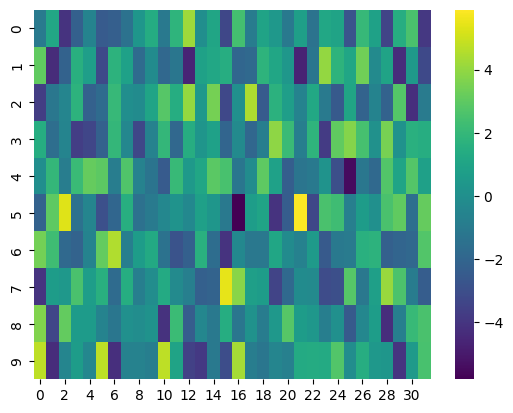

In [66]:
sns.heatmap(trained_network['W4'],cmap="viridis")
plt.show()

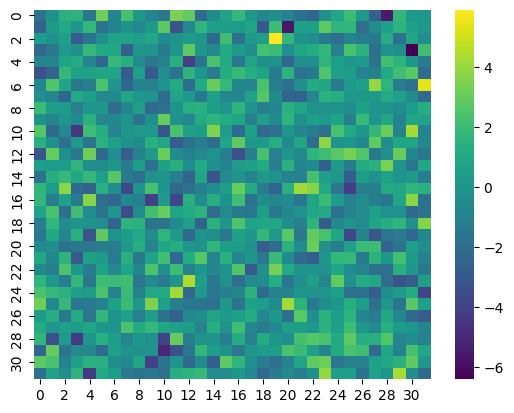

In [67]:
sns.heatmap(trained_network['W3'],cmap="viridis")
plt.show()

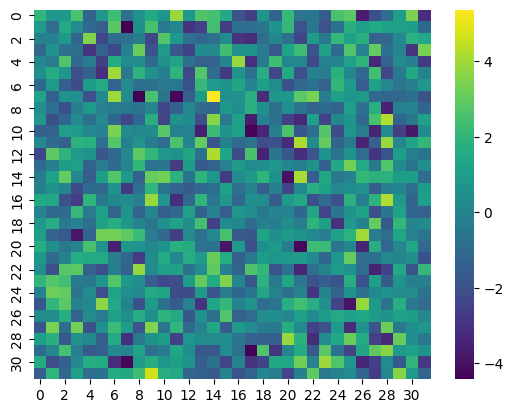

In [68]:
sns.heatmap(trained_network['W2'],cmap="viridis")
plt.show()

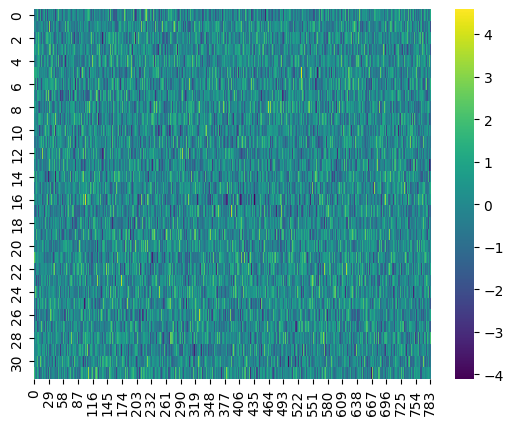

In [69]:
sns.heatmap(trained_network['W1'],cmap="viridis")
plt.show()